In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpl

In [276]:
df= pd.read_csv("Maths.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [277]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [278]:
df['traveltime'] = df['traveltime']/df['traveltime'].max()
df['studytime'] = df['studytime']/df['studytime'].max()

In [279]:
df['traveltime'] = df['traveltime']/df['traveltime'].max()
df[['studytime','traveltime']].head()

,studytime,traveltime
0,0.50,0.50
1,0.50,0.25
2,0.50,0.25
3,0.75,0.25
4,0.50,0.25


Text(0.5, 1.0, 'traveltime bins')

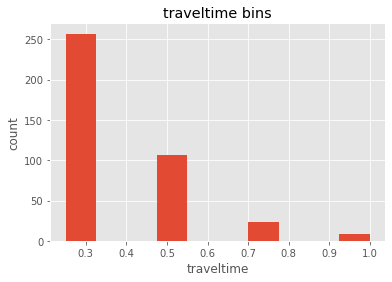

In [280]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["traveltime"])

# set x/y labels and plot title
plt.pyplot.xlabel("traveltime")
plt.pyplot.ylabel("count")
plt.pyplot.title("traveltime bins")

In [281]:
bins = np.linspace(min(df["traveltime"]), max(df["traveltime"]), 4)
bins

array([0.25, 0.5 , 0.75, 1.  ])

In [282]:
group_names = ['Low', 'Medium', 'High']

In [283]:
df['traveltime-binned'] = pd.cut(df['traveltime'], bins, labels=group_names, include_lowest=True )
df[['traveltime','traveltime-binned']].head(10)

,traveltime,traveltime-binned
0,0.50,Low
1,0.25,Low
2,0.25,Low
3,0.25,Low
4,0.25,Low
5,0.25,Low
6,0.25,Low
7,0.50,Low
8,0.25,Low
9,0.25,Low


In [284]:
df["traveltime-binned"].value_counts()

Low       364
Medium     23
High        8
Name: traveltime-binned, dtype: int64

Text(0.5, 1.0, 'traveltime bins')

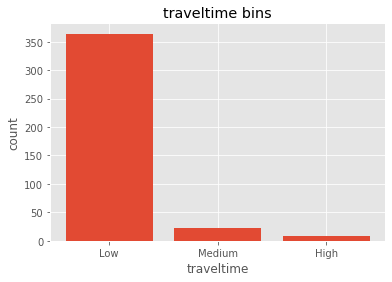

In [285]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["traveltime-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("traveltime")
plt.pyplot.ylabel("count")
plt.pyplot.title("traveltime bins")

Text(0.5, 1.0, 'traveltime bins')

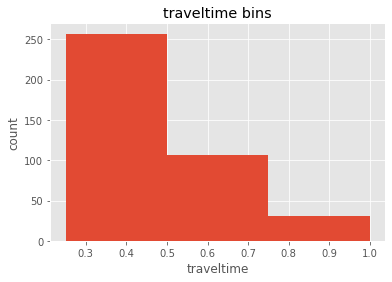

In [286]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["traveltime"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("traveltime")
plt.pyplot.ylabel("count")
plt.pyplot.title("traveltime bins")

In [287]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'traveltime-binned'],
      dtype='object')

In [288]:
dummy_variable_1 = pd.get_dummies(df["sex"])
dummy_variable_1.head()

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [289]:
dummy_variable_1.rename(columns={'F':'sex-F', 'M':'sex-M'}, inplace=True)
dummy_variable_1.head()

,sex-F,sex-M
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [290]:
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("sex", axis = 1, inplace=True)

In [291]:
df.head()

,school,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,Walc,health,absences,G1,G2,G3,traveltime-binned,sex-F,sex-M
0,GP,18,U,GT3,A,4,4,at_home,teacher,course,...,1,1,3,6,5,6,6,Low,1,0
1,GP,17,U,GT3,T,1,1,at_home,other,course,...,1,1,3,4,5,5,6,Low,1,0
2,GP,15,U,LE3,T,1,1,at_home,other,other,...,2,3,3,10,7,8,10,Low,1,0
3,GP,15,U,GT3,T,4,2,health,services,home,...,1,1,5,2,15,14,15,Low,1,0
4,GP,16,U,GT3,T,3,3,other,other,home,...,1,2,5,4,6,10,10,Low,1,0


In [292]:
df.to_csv('clean_df.csv')

In [293]:
print(df.shape)

(395, 35)


In [294]:
age = df.age
age.head()

0    18
1    17
2    15
3    15
4    16
Name: age, dtype: int64

In [295]:
traveltime = df.traveltime
traveltime.head()

0    0.50
1    0.25
2    0.25
3    0.25
4    0.25
Name: traveltime, dtype: float64

In [296]:
df.set_index('age', inplace=True)

In [297]:
df.tail()

,school,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,Dalc,Walc,health,absences,G1,G2,G3,traveltime-binned,sex-F,sex-M
age,,,,,,,,,,,,,,,,,,,,,
20,MS,U,LE3,A,2,2,services,services,course,other,...,4,5,4,11,9,9,9,Low,0,1
17,MS,U,LE3,T,3,1,services,services,course,mother,...,3,4,2,3,14,16,16,Low,0,1
21,MS,R,GT3,T,1,1,other,other,course,other,...,3,3,3,3,10,8,7,Low,0,1
18,MS,R,LE3,T,3,2,services,other,course,mother,...,3,4,5,0,11,12,10,Medium,0,1
19,MS,U,LE3,T,1,1,other,at_home,course,father,...,3,3,5,5,8,9,9,Low,0,1


In [298]:
print(df.loc[18])

# alternate methods
print(df.iloc[87])
print(df[df.index == 18].T.squeeze())

    school address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
age                                                                  
18      GP       U     GT3       A     4     4   at_home   teacher   
18      GP       R     GT3       T     2     2  services     other   
18      GP       U     LE3       T     1     1     other     other   
18      GP       R     GT3       T     1     1   at_home     other   
18      GP       U     GT3       T     2     2  services     other   
..     ...     ...     ...     ...   ...   ...       ...       ...   
18      MS       R     GT3       T     2     2   at_home     other   
18      MS       R     GT3       T     4     4   teacher   at_home   
18      MS       U     LE3       T     3     1   teacher  services   
18      MS       U     GT3       T     1     1     other     other   
18      MS       R     LE3       T     3     2  services     other   

         reason guardian  ...  Dalc  Walc  health absences  G1  G2  G3  \
age            

In [299]:
print(df.loc[18,'Pstatus' ])

# alternate method
print(df.iloc[87, 30])

age
18    A
18    T
18    T
18    T
18    T
     ..
18    T
18    T
18    T
18    T
18    T
Name: Pstatus, Length: 82, dtype: object
14


In [300]:
print(type(df.columns))
print(type(df.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.numeric.Int64Index'>


In [301]:
df.columns.tolist()
df.index.tolist()

print (type(df.columns.tolist()))
print (type(df.index.tolist()))

<class 'list'>
<class 'list'>


In [302]:
df.shape

(395, 34)

In [303]:
df.describe()

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,sex-F,sex-M
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,2.749367,2.521519,0.362025,0.508861,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,0.526582,0.473418
std,1.094735,1.088201,0.174376,0.209810,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,0.499926,0.499926
min,0.000000,0.000000,0.250000,0.250000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.250000,0.250000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,0.000000,0.000000
50%,3.000000,2.000000,0.250000,0.500000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,1.000000,0.000000
75%,4.000000,3.000000,0.500000,0.500000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,1.000000,1.000000
max,4.000000,4.000000,1.000000,1.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,1.000000,1.000000


In [304]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [305]:
print ('Matplotlib version: ', mpl.__version__) 

Matplotlib version:  3.5.1


In [306]:
print(plt.style.available)
mpl.style.use(['ggplot'])

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


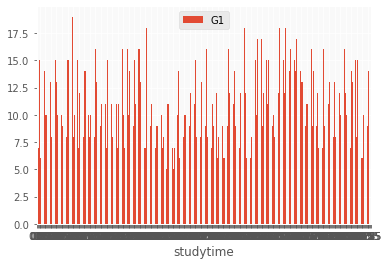

In [307]:
df.plot.bar(x='studytime', y='G1',rot=0);

In [311]:
df.set_index('school', inplace=True)

In [312]:
GP = df.loc['GP', 'G1'] 
GP.head()

school
GP     5
GP     5
GP     7
GP    15
GP     6
Name: G1, dtype: int64

<AxesSubplot:xlabel='school'>

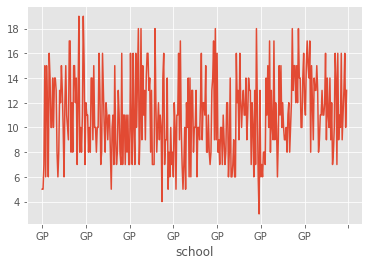

In [313]:
GP.plot()

Text(0.5, 0, 'school')

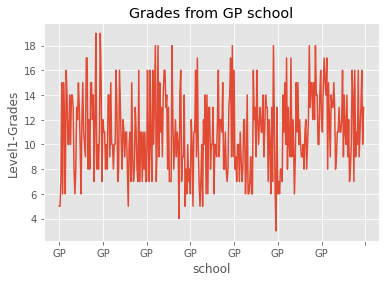

In [314]:
GP.index = GP.index.map(str) # let's change the index values of Haiti to type integer for plotting
GP.plot(kind='line')

plt.title('Grades from GP school')
plt.ylabel('Level1-Grades')
plt.xlabel('school')

array([[<AxesSubplot:title={'center':'G1'}>,
        <AxesSubplot:title={'center':'G2'}>],
       [<AxesSubplot:title={'center':'G3'}>, <AxesSubplot:>]],
      dtype=object)

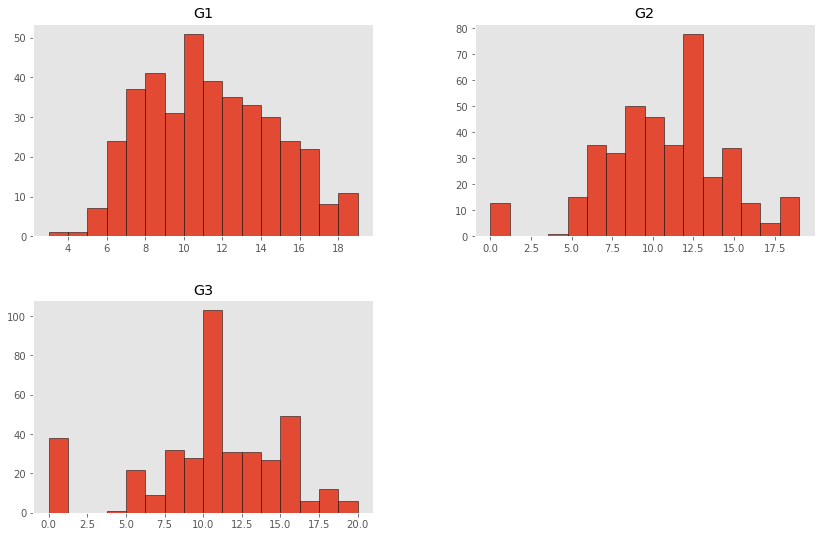

In [315]:
df[['G1','G2', 'G3']].hist(figsize=(14, 9),bins=16,edgecolor='k',grid=False)

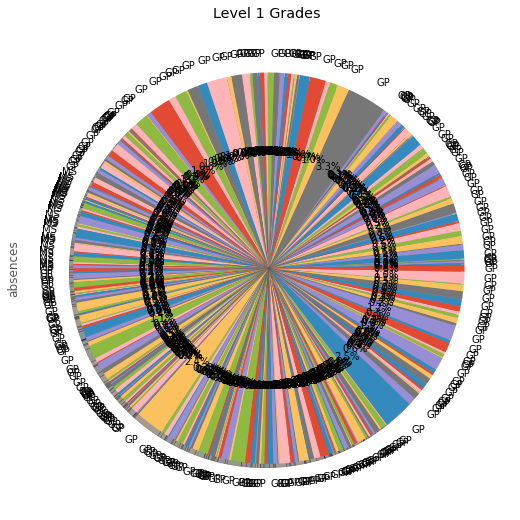

In [316]:
df['absences'].plot(kind='pie', 
                                figsize = (14,9),
                                autopct = '%2.1f%%',
                                startangle = 180,
                                shadow = True,)
plt.title('Level 1 Grades ')

plt.show()